# K-Nearest Neighbors
***
**Name**: Ryan Leonard
**Collaborators**: Problems were discussed with Matt Leubbers and Jack Kawell
***

This assignment is due on Canvas by **5pm on Wednesday September 19th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.


## Overview 
***


In this homework you'll implement prototype based k-nn and perceptron (with offset = 0) training algorithms using convergence method covered in the class.

Most of this assignment will be done by calling libraries that are already implemented for you. You can use python loops to accomplish most of the implementation, but we would strongly encourage you to use vectorized operations using `numpy` package.

Here are the rules: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

### Linear Algebra - 10 points
***
Given matrix:

$$
\begin{equation*}
\mathbf{A} = \begin{bmatrix}2 & -1 & 0\\-1 & 2 & -1\\ 0 & -1 & 2\end{bmatrix}
\end{equation*}
$$

Answer the following questions:

**1.** Are the vectors $\begin{equation*} \mathbf{x} = \begin{bmatrix}2\\-1\\0\end{bmatrix}, \mathbf{y} = \begin{bmatrix}-1 \\ 2 \\ -1\end{bmatrix}, \mathbf{z} = \begin{bmatrix}0 \\ -1 \\2\end{bmatrix} \end{equation*}$ linearly independent? Justify your answer

First, we observe that these columns make up the matrix A. Asking whether or not these columns are linearly independent, is the same as asking whether or not A is invertible. Thus, if $|A| \neq 0$ the column vectors x, y, and z are linearly independent.

Taking the determinant of A, we have:
$$ 2\times(4 - 1) + 1\times(-2 + 0) + 0(1 - 0)$$
$$ = 6 -2 = 4 $$
Thus, these columns are linearly independent.

In [81]:
# Checking my math:
import numpy as np
A = np.array([
    [2, -1, 0],
    [-1, 2, -1],
    [0, -1, 2]
])
np.linalg.det(A)

4.0

**2.** Find the eigenvalues and the corresponding eigenvectors of $\mathbf{A}$

First, finding the eigenvalues is the same as finding the determinant of $A - \lambda I = \begin{bmatrix}
2-\lambda & -1 & 0\\
-1 & 2- \lambda & -1 \\
0 & -1 & 2-\lambda
\end{bmatrix}$
Which is equal to: 
$$ (2-\lambda) (((2-\lambda)^2 - 1) + (\lambda-2))$$
$$ = (2-\lambda)^3 + (2\lambda - 4)$$
$$ = (2-\lambda)(\lambda^2 - 4\lambda + 2)$$
Plugging the quadratic term into the quadratic formula, we find that the roots of this polynomial are:
$2$, $2 + \sqrt{2}$ and $2 - \sqrt{2}$

Now, using these eigenvalues, we can compute the eigenvectors of A by row reducing $A-\lambda I$ for each eigenvalue.
For $\lambda=2$:
$$
\begin{bmatrix}
0 & -1 & 0\\
-1 & 0 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$
$$
\begin{bmatrix}
-1 & 0 & -1\\
 0 & 0 & 0\\
0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x1\\x2\\x3
\end{bmatrix}
=
\begin{bmatrix}
0\\0\\0
\end{bmatrix}
$$
$$
\begin{bmatrix}
x1\\x2\\x3
\end{bmatrix}
=
\begin{bmatrix}
1\\0\\-1
\end{bmatrix}
$$
Repeating this procedure for our remaining two eigenvalues, we find that the eigenvector associated with $\lambda = 2+\sqrt{2}$ is $ \begin{bmatrix} 1 \\ -\sqrt{2} \\1 \end{bmatrix}$
and the vector associated with $\lambda = 2-\sqrt{2}$ is $ \begin{bmatrix} 1 \\ \sqrt{2} \\1 \end{bmatrix}$

In [82]:
print(2 - np.sqrt(2))
print(2 + np.sqrt(2))

0.5857864376269049
3.414213562373095


In [83]:
# Checking my math:
evals, evecs = np.linalg.eig(A)

In [84]:
evals

array([3.41421356, 2.        , 0.58578644])

In [86]:
2 * evecs

array([[-1.00000000e+00, -1.41421356e+00,  1.00000000e+00],
       [ 1.41421356e+00,  8.11850587e-16,  1.41421356e+00],
       [-1.00000000e+00,  1.41421356e+00,  1.00000000e+00]])

**3.** Let $M$ be any matrix with real entries. $M$ is *positive semidefinite* if, for any vector $x$ with real components, the dot product of $Mx$ and $x$ is nonnegative, $\langle Mx, x \rangle \geq 0$

Let $B = \begin{bmatrix}1 & 2\\-2 & 1\end{bmatrix}$. Show that $B$ is positive semidefinite.(i.e., show that $\langle Bx, x \rangle \geq 0$)

let x = $\begin{bmatrix}x_1\\x_2 \end{bmatrix}$. Then $Bx$ becomes: $\begin{bmatrix} x_1 + 2x_2\\ -2x_1 + x_2\end{bmatrix}$ Taking the dot product with x, we have: $$x_1^2 + 2x_1x_2 -2x_1x_2+x_2^2$$ $$=x_1^2 + x_2^2$$

Thus, because $x_1$ and $x_2$ are real, the square of any real number is positive. Additionally, because the sum of two positive numbers is always positive, we can see that $x_1^2 + x_2^2 \geq 0$ and thus $\langle Bx, x \rangle \geq 0$

**4.** A *symmetric* matrix $H$ is positive semidefinite if and only if the eigenvalues of $H$ are all non-negative. Is matrix $A$ positive semidefinite? Why?

A is positive semidefinite. Its eigenvalues are $2$, $2+\sqrt{2}$ and $2-\sqrt{2}$, all of which are greater than zero. Because its values are all greater than zero, we can also say that $A$ is positive definite.

### Prototype Based K-NN - 10 points
***

In this problem you'll implement a prototype based K-Nearest Neighbor framework to take an image of a handwritten digit and predict which digit it corresponds to.

<br>

![Samples of Handwritten Digits](wide_mnist.png "MNIST Digits")


<br>

In [6]:
import numpy as np
import matplotlib.pylab as plt
import pickle
%matplotlib inline

The class below will load and store the MNIST data.  Load the data and then report: 
- The number of examples in the training set 
- The number of examples in the test set 
- The number of pixels in each image. 
- Plot the number of data points per class
   

In [2]:
class Numbers:
    """
    Class to store MNIST data
    """
    def __init__(self, location):

        import pickle, gzip

        # load data from file 
        f = gzip.open(location, 'rb')
        train_set, valid_set, test_set = pickle.load(f)
        f.close()

        # store for use later  
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

In [10]:
DATA_PATH = "data/mnist.pklz"
data = Numbers(DATA_PATH)

In [4]:
print("This dataset has {} training examples.".format(data.train_x.shape[0]))
print("This dataset has {} test examples.".format(data.test_x.shape[0]))
print("Each image has {} pixels.".format(data.train_x.shape[1]))

unique, counts = np.unique(data.train_y, return_counts=True)
print("This dataset has: ")
for i, val in enumerate(counts):
    if i == 9: print("and ")
    print("{} {}'s".format(val, i))
print("in the training set")

This dataset has 50000 training examples.
This dataset has 10000 test examples.
Each image has 784 pixels.
This dataset has: 
4932 0's
5678 1's
4968 2's
5101 3's
4859 4's
4506 5's
4951 6's
5175 7's
4842 8's
and 
4988 9's
in the training set


The class below will perform K-Nearest Neighbor classification on our handwritten digit data. Your tasks are as follows:

1. Modify `select_prototypes` method to select `p` random prototypes from training data which will be used for finding `k` nearest neighbors instead of all the training data points.
1. Modify the `label_counts` function to return a dictionary of frequencies corresponding to each label in the training set.
1. Modify the `majority` function so that it returns the _label_ that appears most frequently in the $K$-nearest neighbors of the query point.  In the case that the maximum frequency occurs for two or more labels, return the one that appears most frequently in the entire training set. In the case that there is still a tie, break the tie in any way that you choose.
1. Modify the `confusion_matrix` function to classify examples and record the results in a confusion matrix. You should construct the confusion matrix on your own. Don't call any additional functions from sklearn to do it for you.
1. Modify the `classify` function so that it finds the indices of the $K$ closest training examples to the query point and then calls the `majority` function to return the predicted label. Almost all of the heavy lifting here will be done by the `BallTree` object from sklearn.neighbors, so you'll want to start out by reading the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree.query)

The class Knearest also implements an accuracy function which you will use in subsequent problems. You should not have to modify this function.

In [5]:
data.train_x[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
p = 20
data = np.ndarray((p, 2))
labels = np.ndarray((p, 1))
for i in range(p):
    data[i] = [i, i]
    labels[i] = [i]

In [11]:
from sklearn.preprocessing import normalize

In [12]:
from sklearn.neighbors import BallTree
from sklearn.preprocessing import normalize

class Knearest:
    """
    kNN classifier
    """

    def __init__(self, X, y, k=5, p=10):
        """
        Creates a kNN instance

        :param x: Training data input
        :param y: Training data output
        :param k: The number of nearest points to consider in classification
        :param p: The number of prototypes to choose
        """
        
        
        self._p = p
        self._x, self._y = self.select_prototypes(X, y)
        self._k = k
        self._counts = self.label_counts(y)
        self._kdtree = BallTree(self._x)
        self.misclassifications = []
            
    def label_counts(self, y):
        """
        Given the training prototypes, return a dictionary d where d[y] is  
        the number of times that label y appears in the training prototypes.
        
        :param y: Training labels input
        """   
        counts_dict = {}
        unique, counts = np.unique(y, return_counts=True)
        for i in range(len(counts)):
            counts_dict[unique[i]] = counts[i]
        return counts_dict


    def majority(self, neighbor_indices):
        """
        Given the indices of training protypes, return the majority label. Break ties 
        by choosing the tied label that appears most often in the training prototypes. 

        :param neighbor_indices: The indices of the k nearest neighbors
        """
        assert len(neighbor_indices) == self._k, "Did not get k neighbor indices"
        # Create a dictionary for the frequency of each label
        counts_dict = {}
        for index in neighbor_indices:
            label = self._y[index]
            if label in counts_dict.keys():
                counts_dict[label] += 1
            else:
                counts_dict[label] = 1
        
        # identify the label with the greatest frequency and also detect ties.
        tie = False
        max_frequency = -1
        max_label = None
        for key in counts_dict.keys():
            if counts_dict[key] == max_frequency:
                tie = True
            if counts_dict[key] > max_frequency:
                max_frequency = counts_dict[key]
                max_label = key
                tie = False  # we found a new max and no longer have a tie.
                
        # if we have a tie, return the most frequent label in the dataset       
        if tie: 
            unique, counts = np.unique(self._y, return_counts=True)
            return unique[counts.argmax()]
        else:
            return max_label
    

    def classify(self, example):
        """
        Given an example, return the predicted label.

        :param example: A representation of an example in the same
        format as a row of the training data
        """
        dist, ind = self._kdtree.query([example], k=self._k)
        return self.majority(ind[0])
        
        
    def select_prototypes(self, X, y):
        """
        Given the train data, select p random prototypes from data for classification
        calculation.
        
        :param x: Training data input
        :param y: Training data output
        """
        # given a set X, select a random sample y from that set
        # Select self.p elements 
        randomize = np.arange(len(X))
        np.random.shuffle(randomize)
        X = X[randomize]
        y = y[randomize]
        return X[:self._p], y[:self._p] 
            
    def confusion_matrix(self, test_x, test_y):
        """
        Given a matrix of test examples and labels, compute the confusion
        matrix for the current classifier.  Should return a 2-dimensional
        numpy array of ints, C, where C[ii,jj] is the number of times an 
        example with true label ii was labeled as jj.

        :param test_x: test data 
        :param test_y: true test labels 
        """
        correct = 0
        incorrect = 0
        C = np.zeros((10,10), dtype=int)
        for xx, yy in zip(test_x, test_y):
            pred_label = self.classify(xx)
            if (pred_label == yy):
                correct += 1
            else:
                # Get some misclassification examples for part c
                self.misclassifications.append([xx, pred_label, yy])
                incorrect += 1
            C[yy, pred_label] += 1
        print("Accuracy: {}".format(correct/(correct + incorrect)))
        return C 
            
    @staticmethod
    def accuracy(C):
        """
        Given a confusion matrix C, compute the accuracy of the underlying classifier.
        
        :param C: a confusion matrix 
        """
        
        return np.sum(C.diagonal()) / C.sum()

#### Shouldnt have to touch this code.

In [13]:
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[2, 0], [4, 1], [6, 0], [1, 4], [2, 4], [2, 5], [4, 4], [0, 2], [3, 2], [4, 2], [5, 2], [5, 5]])
        self.y = np.array([+1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1])
        self.knn = {}
        for ii in [1, 2, 3]:
            self.knn[ii] = Knearest(self.x, self.y, ii, len(self.x))

        self.queries = np.array([[1, 5], [0, 3], [6, 4]])
        
    def test0(self):
        """
        Test the label counter 
        """
        print("Running Test 0")
        self.assertEqual(self.knn[1]._counts[-1], 5)
        self.assertEqual(self.knn[1]._counts[1], 7)

    def test1(self):
        """
        Test 1NN
        """
        self.assertEqual(self.knn[1].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[1].classify(self.queries[1]), -1)
        self.assertEqual(self.knn[1].classify(self.queries[2]), -1)

    def test2(self):
        """
        Test 2NN
        """
        self.assertEqual(self.knn[2].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[2].classify(self.queries[1]),  1)
        self.assertEqual(self.knn[2].classify(self.queries[2]),  1)

    def test3(self):
        """
        Test 3NN
        """
        self.assertEqual(self.knn[3].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[3].classify(self.queries[1]),  1)
        self.assertEqual(self.knn[3].classify(self.queries[2]), -1)
        
tests = TestKnn()

# original
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
# original
unittest.TextTestRunner().run(tests_to_run)

....

Running Test 0



----------------------------------------------------------------------
Ran 4 tests in 0.011s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

Now, you'll explore the performance of the classifier you've written.

**Part A:** Explore the relationship between the number of training examples and accuracy on the test set. Comment on your findings and support your observations with some kind of plot.

In [11]:
knn = Knearest(X=data.train_x, y=data.train_y, p=10000)

Vary training dataset in this cell instead

In [12]:
# This is literally just getting a prototypes dataset
def training_subset(X, y, n_samples):
    # Given a training set and labels (x, y) return a subset of those labels:
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    y = y[randomize]
    return X[:n_samples], y[:n_samples] 

In [13]:
# Vary the size of the training set while holding k = 5 and p = 1000
confusion_matrices =[]
p=1000
k = 5
for t in range(2000, 50000, 1000):
    print("Training Size = {}".format(t))
    x, y = training_subset(data.train_x, data.train_y, t)
    knn = Knearest(X=x, y=y, p=p, k=k)
    C = knn.confusion_matrix(data.test_x, data.test_y)
    confusion_matrices.append((t, C))
with open("confusion_matrices_varying_training_set.pkl", 'wb') as pkl_file:
    pickle.dump(confusion_matrices, pkl_file)

Training Size = 2000


KeyboardInterrupt: 

### Plotting the relationship between the size of the training set and the accuracy of knn:

(0, 1)

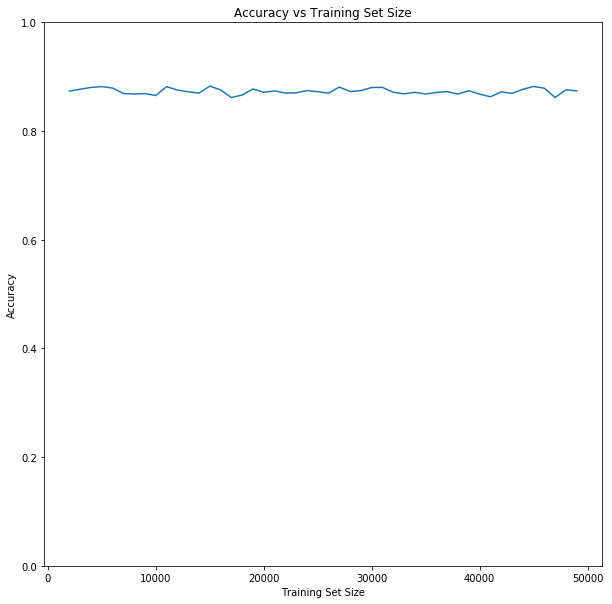

In [44]:
# Load a dataset so i dont have to run the above code again...
with open("confusion_matrices_varying_training_set.pkl", 'rb') as pkl_file:
    confusion_matrices = pickle.load(pkl_file)
# Extract the data into a matplotlib friendly format
t_size = []
accuracy = []
for tup in confusion_matrices:
    t, mat = tup
    t_size.append(t)
    accuracy.append(knn.accuracy(mat))
    
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)
ax1.plot(t_size, accuracy)
ax1.set_title('Accuracy vs Training Set Size')
ax1.set_xlabel('Training Set Size')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0, 1])

#### Explanation of plot
In the plot above, we can plainly see that there does not appear to be any relationship between the size of the training set and the accuracy of knn. This makes sense because, while the knn algorithm takes a training set as input, it will collect a random sample of that training set based on p and then evaluate that dataset based on k. Thus, for every iteration, knn uses exactly the same number of data points, regardless of the size of the overall training set, and evaluates it with the same value of k. 

**Part B**: Explore the relationship between the number of nearest neighbors and accuracy on the test set. Comment on your findings and support your observations with some kind of plot.

In [27]:
# Vary k while maintaining a costant p (p = 1000)
confusion_matrices =[]
for k in range(1,51):
    print("k = {}".format(k))
    knn = Knearest(X=data.train_x, y=data.train_y, p=1000, k=k)
    C = knn.confusion_matrix(data.test_x, data.test_y)
    confusion_matrices.append((k, C))    
    
# Save the data
import pickle
with open("confusion_matrices_constant_p1000_diff_k.pkl", 'wb') as pkl_file:
    pickle.dump(confusion_matrices, pkl_file)

k = 1
Accuracy: 0.8971
k = 2
Accuracy: 0.805
k = 3
Accuracy: 0.8788
k = 4
Accuracy: 0.8608
k = 5
Accuracy: 0.8735
k = 6
Accuracy: 0.8685
k = 7
Accuracy: 0.8699
k = 8
Accuracy: 0.8573
k = 9
Accuracy: 0.8743
k = 10
Accuracy: 0.8646
k = 11
Accuracy: 0.8533
k = 12
Accuracy: 0.8593
k = 13
Accuracy: 0.8656
k = 14
Accuracy: 0.8439
k = 15
Accuracy: 0.8619
k = 16
Accuracy: 0.8632
k = 17
Accuracy: 0.8274
k = 18
Accuracy: 0.8476
k = 19
Accuracy: 0.8502
k = 20
Accuracy: 0.8452
k = 21
Accuracy: 0.8333
k = 22
Accuracy: 0.8422
k = 23
Accuracy: 0.8321
k = 24
Accuracy: 0.8164
k = 25
Accuracy: 0.7942
k = 26
Accuracy: 0.8339
k = 27
Accuracy: 0.814
k = 28
Accuracy: 0.8049
k = 29
Accuracy: 0.8073
k = 30
Accuracy: 0.8249
k = 31
Accuracy: 0.8015
k = 32
Accuracy: 0.8221
k = 33
Accuracy: 0.7765
k = 34
Accuracy: 0.8173
k = 35
Accuracy: 0.8097
k = 36
Accuracy: 0.8112
k = 37
Accuracy: 0.8142
k = 38
Accuracy: 0.7972
k = 39
Accuracy: 0.8062
k = 40
Accuracy: 0.7924
k = 41
Accuracy: 0.8148
k = 42
Accuracy: 0.7899
k =

In [ ]:
# Plotting accuracy vs k, we have:


(0, 1)

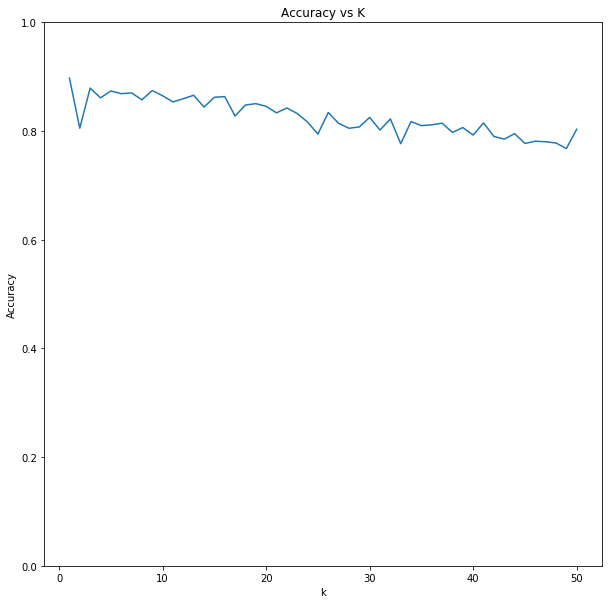

In [46]:
# Load a dataset so i dont have to run the above code again...
with open("confusion_matrices_constant_p1000_diff_k.pkl", 'rb') as pkl_file:
    confusion_matrices = pickle.load(pkl_file)
# Extract the data into a matplotlib friendly format
k_vals = []
accuracy = []
for tup in confusion_matrices:
    k, mat = tup
    k_vals.append(k)
    accuracy.append(knn.accuracy(mat))
    
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)
ax1.plot(k_vals, accuracy)
ax1.set_title('Accuracy vs K')
ax1.set_xlabel('k')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0, 1])

#### Explanation of plot:
We can see that as k increases, the accuracy of the knn algorithm, in general, decreases. We see an interesting sharp dip in accuracy when k == 2. This dip is likely due to that a 'tie' in the algorithm is most likely to occur when k == 2, which suggests that our tie breaking mechanism needs to be improved. 
For the remainder of the knn algorithm analysis, a value of k=3 is used. While using k == 1 showed better performance than k == 3, training around a value of 1 introduces additional variance into our algorithm. Increasing k will increase the bias, but should lead to a more robust model when dealing with more data.

**Part C**: Which numbers get confused with each other the most easily?  Use the confusion_matrix function that you wrote above to support your conclusion.  Then use the `view_digit` function given below to plot a few examples of misclassified digits and discuss possible reasons for the misclassifications.  (Investigating misclassified examples is called **error analysis** and is an important step in the development of any classification technique).  

### Using the confusion matrix for k == 3 and p == 1000

true label: 5


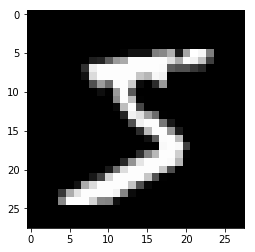

In [61]:
def view_digit(example, label=None):
    if label: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
    

### Solution: 
By examining the off diagonal elements of the confusion matrix, we can see that the greatest confusion lies between classes: 4 and 9, as well as between classes 3 and 8

Examining some of the misclassifications in detail below, we can see that there are some labels which are easily misidentified, such as the 1, 7 example or the 4, 9 example. However there are other examples which are just outright horroble, such as the misclassification of an 8 as a 1 depicted in the third figure

In [49]:
# TODO: create a numpy 1xn subplot and in the title of each subplot, label pred:true
matrix = confusion_matrices[2][1]

In [50]:
matrix

array([[ 936,    0,    3,   18,    0,   10,   18,    6,    0,    0],
       [   0, 1054,    2,    3,    1,    0,    0,    2,    1,    1],
       [   4,   33,  858,   42,    5,    0,    3,   35,    6,    4],
       [   2,    6,    3,  973,    0,   25,    0,    5,    6,   10],
       [   0,   29,    0,   38,  796,    2,    7,    4,    0,  107],
       [   1,   16,    0,  112,    3,  722,   28,    2,   12,   19],
       [   8,    3,    0,   15,    5,    2,  932,    0,    2,    0],
       [   2,   42,    0,   21,    9,    0,    0,  966,    0,   50],
       [   7,   42,    2,  133,    6,   19,   10,    8,  759,   23],
       [   4,   10,    0,   67,   34,    3,    0,   51,    0,  792]])

In [58]:
# Train this dataset again and pull out some mis-classification examples
knn = Knearest(X=data.train_x, y=data.train_y, p=1000, k=k)
C = knn.confusion_matrix(data.test_x, data.test_y)

Accuracy: 0.7859


#### Sample misclassificaitons

Predicted: 1, Truth: 7


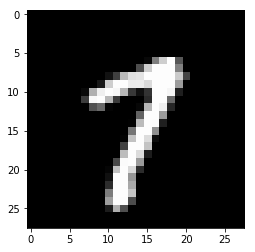

In [67]:
i = 10
print("Predicted: {}, Truth: {}".format(knn.misclassifications[i][1], knn.misclassifications[i][2]))
view_digit(knn.misclassifications[i][0])

Predicted: 4, Truth: 9


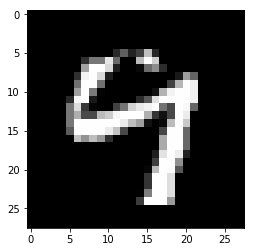

In [68]:
i = 100
print("Predicted: {}, Truth: {}".format(knn.misclassifications[i][1], knn.misclassifications[i][2]))
view_digit(knn.misclassifications[i][0])

Predicted: 1, Truth: 8


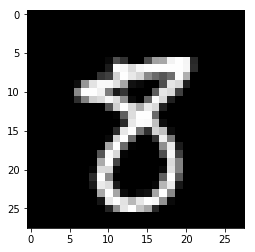

In [69]:
i = 1000
print("Predicted: {}, Truth: {}".format(knn.misclassifications[i][1], knn.misclassifications[i][2]))
view_digit(knn.misclassifications[i][0])

Predicted: 7, Truth: 9


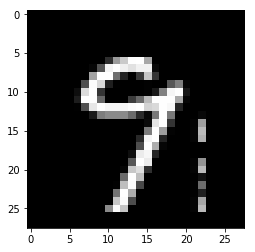

In [72]:
i = 1764
print("Predicted: {}, Truth: {}".format(knn.misclassifications[i][1], knn.misclassifications[i][2]))
view_digit(knn.misclassifications[i][0])

In [64]:
#classified 9 but actually 4
x4_9 = None
x3_8 = None
for error in knn.misclassifications:
    if error[1] == 4 and error[2] == 9:
        x4_9 = error[0]
    if error[1] == 3 and error[2] == 8:
        x3_8 = error[0]
    if x4_9 is not None and x3_8 is not None:
        break

**Part D**: Now using the entire training dataset and best value of `k` found from previous analysis, plot test accuracy vs number of prototypes for reasonable values of p (more than 1000). What are the trade-offs you are making when using prototypes instead of all the training examples?

In [35]:
# Vary P while holding K=3
confusion_matrices =[]
for p in range(100, 10000, 100):
    print("P = {}".format(p))
    knn = Knearest(X=data.train_x, y=data.train_y, p=p, k=3)
    C = knn.confusion_matrix(data.test_x, data.test_y)
    confusion_matrices.append((p, C))
with open("confusion_matrices_constant_k5_diff_p.pkl", 'wb') as pkl_file:
    pickle.dump(confusion_matrices, pkl_file)

P = 100
Accuracy: 0.6156
P = 200
Accuracy: 0.7662
P = 300
Accuracy: 0.7639
P = 400
Accuracy: 0.8208
P = 500
Accuracy: 0.8248
P = 600
Accuracy: 0.851
P = 700
Accuracy: 0.8576
P = 800
Accuracy: 0.8682
P = 900
Accuracy: 0.875
P = 1000
Accuracy: 0.8789
P = 1100
Accuracy: 0.8823
P = 1200
Accuracy: 0.8904
P = 1300
Accuracy: 0.8951
P = 1400
Accuracy: 0.8975
P = 1500
Accuracy: 0.8961
P = 1600
Accuracy: 0.8977
P = 1700
Accuracy: 0.9022
P = 1800
Accuracy: 0.9024
P = 1900
Accuracy: 0.9103
P = 2000
Accuracy: 0.9083
P = 2100
Accuracy: 0.9111
P = 2200
Accuracy: 0.9142
P = 2300
Accuracy: 0.9125
P = 2400
Accuracy: 0.9179
P = 2500
Accuracy: 0.9207
P = 2600
Accuracy: 0.9163
P = 2700
Accuracy: 0.9217
P = 2800
Accuracy: 0.9167
P = 2900
Accuracy: 0.9247
P = 3000
Accuracy: 0.9232
P = 3100
Accuracy: 0.9242
P = 3200
Accuracy: 0.9232
P = 3300
Accuracy: 0.927
P = 3400
Accuracy: 0.9247
P = 3500
Accuracy: 0.9329
P = 3600
Accuracy: 0.9291
P = 3700
Accuracy: 0.9298
P = 3800
Accuracy: 0.9259
P = 3900
Accuracy: 0.928

(0, 1)

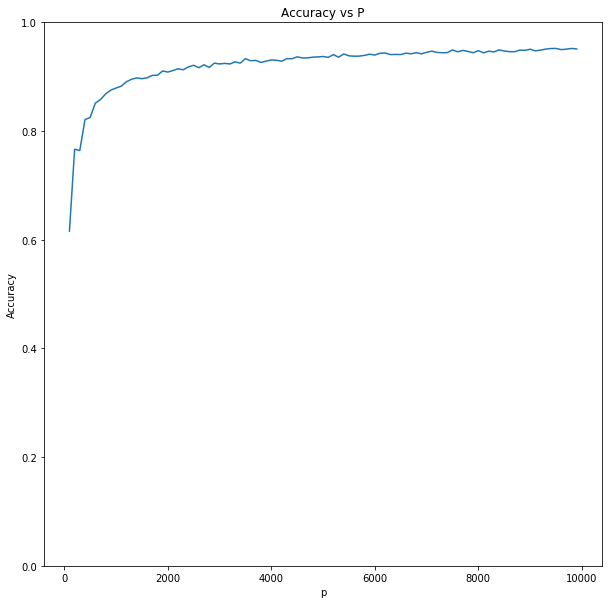

In [74]:
# Load a dataset so i dont have to run the above code again...
with open("confusion_matrices_constant_k5_diff_p.pkl", 'rb') as pkl_file: # this file is mislabeled... it is actually k=3
    confusion_matrices = pickle.load(pkl_file)
# Extract the data into a matplotlib friendly format
p_vals = []
accuracy = []
for tup in confusion_matrices:
    p, mat = tup
    p_vals.append(p)
    accuracy.append(knn.accuracy(mat))
    
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)
ax1.plot(p_vals, accuracy)
ax1.set_title('Accuracy vs P')
ax1.set_xlabel('p')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0, 1])

#### Analysis of plot
We can see that our classifier becomes more accurate as the number of prototypes increases, however, this accuracy boost appears to converge to approximately 0.94 once p reaches 4000. This is an important observation, as the knn classifier must use all of its prototypes for each classification. While using all of the training data may produce a marginally more accurate classifier, using 4000 prototypes instead of 50000 training examples results in a classifier that is much more portable. 

An additional benefit of using a few prototypes instesad of the entire training set is that our classifier will be able to make its classifications more quickly. This performance boost comes from the fact that the classifier will have to compare each input against fewer training points, and thus will perform fewer operations.

### Perceptron - 10 points
***
Consider the IRIS dataset discussed in lecture. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length. This training data and the modified labels can be loaded using `IrisM` class. We are going to use this dataset for training a Perceptron classifier in subsequent problems. 
<br>

![Samples of Iris Flowers](wide_iris.png "Iris Dataset")


<br>

In [67]:
class IrisM:
    """
    Class to store modified iris data for Perceptron Training
    """
    
    def __init__(self):
        from sklearn import datasets
        
        iris = datasets.load_iris()
        
        # only taking first two features
        X = iris.data[:, :2]
        y = iris.target[:]
        
        # only considering whether it is setosa or not
        y[iris.target != 0] = -1
        y[iris.target == 0] = 1
        
        mask = np.random.choice(a = [False, True], size = 150, p = (0.66, 1 - 0.66))
        
        self.train_x, self.train_y = X[mask], y[mask]
        self.test_x, self.test_y = X[~mask], y[~mask]
        
        

In [68]:
iris = IrisM()

The class below implements Perceptron classifier in Python on modified IRIS data. The `Peceptron` class implements a Perceptron classifier on a training set of n examples, each of which is  d dimensional vector. The labels for the examples are -1 or 1. This is a simple preceptron classifier seen in class where the linear separator passes through the origin i.e has offset parameter = 0. Your tasks are as following:
1. Implement `train` function which trains a Perceptron classifier on a training set. The function should return $\theta$, the final classification vector and the number of updates performed
1. Implement `predict` function which takes an example as input and returns the predicted label
1. Implement `margin` function which returns geometric margin of the classifier

In [88]:
class Perceptron:
    """
    Perceptron Classifier
    """
    
    def __init__(self, X, y):
        """
        Creates a kNN instance

        :param X: Training data input
        :param y: Training data output
        """
        self._X = X
        self._y = y
        self._theta, self._iter = self.train(X, y)
        
    def train(self, X, y):
        """
        Train perceptron and return final classification vector and
        the number of updates performed respectively
        
        :param X: Training data input
        :param y: Training data output
        """
        total_updates = 0
        theta = np.zeros((1, X.shape[1]))
        epochs = 5
        for i in range(epochs):
            for data, label in zip(X, y):
#                 print("Total updates: {}".format(total_updates))
                # Perform initial classification
                pred_label = 1 if np.dot([data], theta[0]) > 0 else -1
    #             pred_label = self.predict(data)
                # If mis-classification, update
                if pred_label < label: 
                    total_updates += 1
                    x_normalized = normalize([data])
                    theta[0] += x_normalized[0]

                if pred_label > label:
                    x_normalized = normalize([data])
                    total_updates += 1
                    theta[0] -= x_normalized[0]
        return theta, total_updates
    
    def predict(self, X):
        """
        Predicts the label for input
        
        :param X: Testing data input
        """
        return 1 if np.dot(X, self._theta[0]) > 0 else -1

    def margin(self):
        """
        Returns geometric margin of the classifier
        """
        # ** The formula for the margin is (theta_normalized dot x)
        
        # For now, the margin is being computed as the minimum distance between the
        # classification vector, and all training points
        min_dist = float('inf')
        theta_normalized = normalize(self._theta)
        for point in self._X:
            x_normalized = normalize([point])
#             print("Theta Normalized: {}".format(theta_normalized))
#             print("Point: {}".format(point))
            dist = abs(np.dot([point], theta_normalized[0])) # The distance between the normalized classification vector and the non-normalized point
#             dist = abs(np.dot([point], self._theta[0])) # The distance between the non-normalized classification vector and the non-normalized point
#             dist = np.dot([x_normalized], self._theta[0])  # The distance between the non-normalized classification vector and the normalized point
            if dist < min_dist:
                min_dist = dist
        return min_dist
    
    def get_theta(self):
        return self._theta
    
    def get_num_iter(self):
        return self._iter

In [89]:
import unittest

class TestPerceptron(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[1, 2], [4, 5], [2, 1], [5, 4]])
        self.y = np.array([+1, +1, -1, -1])
        self.perceptron = Perceptron(self.x, self.y)
        self.queries = np.array([[1, 5], [0, 3], [6, 4], [2, 2]])

    def test0(self):
        """
        Test Perceptron
        """
        self.assertEqual(self.perceptron.predict(self.queries[0]),  1)
        self.assertEqual(self.perceptron.predict(self.queries[1]),  1)
        self.assertEqual(self.perceptron.predict(self.queries[2]), -1)
        self.assertEqual(self.perceptron.predict(self.queries[3]), -1)
        print("Margin: {}".format(self.perceptron.margin()))
tests = TestPerceptron()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

.

Margin: [0.70710678]



----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

Now, we are going to using `IrisM` dataset to train a perceptron using `Perceptron` class.

**Part A:** From class we know that this data is linearly separable but the separator does not pass through the origin. Therefore you will need to follow the technique used in lecture to further pre-process the data to be linearly separable through the origin: for each data point, add an additional feature, set to a constant value (please use the value 1 for consistency). Then, use the `Perceptron` class to train a Perceptron classifier.

### Note:
Training occurred over 5 epochs

In [90]:
num_updates = []
for i in range(20):
    iris = IrisM()
    column_ones_train = np.ones((iris.train_x.shape[0], 1))
    column_ones_test = np.ones((iris.test_x.shape[0], 1))
    lin_sep_train_x = np.append(iris.train_x, column_ones_train, axis=1)
    lin_sep_test_x = np.append(iris.test_x, column_ones_test, axis=1)
    lin_sep_test_y = iris.test_y
    lin_sep_train_y = iris.train_y
    perceptron = Perceptron(lin_sep_train_x, lin_sep_train_y)
    num_updates.append(perceptron.get_num_iter())

In [71]:
column_ones_train = np.ones((iris.train_x.shape[0], 1))
column_ones_test = np.ones((iris.test_x.shape[0], 1))

In [72]:
lin_sep_train_x = np.append(iris.train_x, column_ones_train, axis=1)
lin_sep_test_x = np.append(iris.test_x, column_ones_test, axis=1)
lin_sep_test_y = iris.test_y
lin_sep_train_y = iris.train_y

In [73]:
perceptron = Perceptron(lin_sep_train_x, lin_sep_train_y)

Updating
Updating
Updating
Updating


**Part B:** What is the angle between Perceptron's classification vector and vector $(1, 0)^T$? Report number of iterations to converge and the accuracy on test set.

In [92]:
test_vec = np.array([1, 0, 1])
classification_vector = perceptron.get_theta()
num_iter = perceptron.get_num_iter()
print("The perceptron performed {} updates to obtain a classification vector of {}".format(num_iter, classification_vector[0]))

print("On average, the perceptron performed {} updates over the course of training".format(np.mean(num_updates)))

The perceptron performed 2 updates to obtain a classification vector of [-0.07171387  0.11137475  0.03480461]
On average, the perceptron performed 7.95 updates over the course of training


To compute the angle between the classification vector and the vector $(1, 0)^T$, we need to match the dimensions of our two vectors. This can be done by converting the vector to the same form as a training point. i.e. $(1, 0)^T \rightarrow (1, 0, 1)^T$

The angle between the two vectors can be computed using the following formula: 
$$ \theta = cos^-1 \left( \frac{ \vec u \cdot \vec v}{||\vec u || || \vec v ||}\right) $$

In [75]:
angle = np.arccos(np.dot(test_vec, classification_vector[0])/(np.linalg.norm(classification_vector[0]) * np.linalg.norm(test_vec)))
angle = angle * 180 / np.pi
print("The angle between the test vector and the classification vector is {}".format(angle))

The angle between the test vector and the classification vector is 99.52865300329756


In [76]:
correct = 0
incorrect = 0
num_iters = []
for vec, label in zip(lin_sep_test_x, lin_sep_test_y):
    if perceptron.predict(vec) == label:
        num_iters.append(perceptron.get_num_iter())
        correct += 1
    else:
        incorrect += 1
        num_iters.append(perceptron.get_num_iter())
print("The accuracy of the perceptron classifier on the test set is {}".format(correct / (correct + incorrect)))
print("The average number of iterations for training was: {}".format(np.mean(num_iters)))
print("The average number of iterations for training was: {}".format(perceptron._iter))

The accuracy of the perceptron classifier on the test set is 0.98989898989899
The average number of iterations for training was: 4.0
The average number of iterations for training was: 4


**Part C:** Compute the geometric margins of your classifier with respect to the `IrisM` dataset used. Recall that the distance of a point from $x_t$ from the line $\theta^T x = 0$ is $\frac{\theta^Tx_t}{||x||}$

In [77]:
margin = perceptron.margin()
print("The margin of the perceptron classifier is {}".format(margin[0]))

The margin of the perceptron classifier is 0.09923247038005345
